# 案例1、Keras版本模型训练

相关函数
- 构建模型(顺序模型、函数式模型、子类模型)
- 模型训练：model.fit()
- 模型验证：model.evaluate()
- 模型预测：model.predict()

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


## 1.1 构建模型

In [2]:
# batch_size=32,数据维度32
inputs = tf.keras.Input(shape=(32,))
# 64个神经元
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
# 63个神经元
x = tf.keras.layers.Dense(64, activation='relu')(x)
# 输出10个类
predictions = tf.keras.layers.Dense(10)(x)

In [3]:
#- inputs:输入模型
#- output:输出模型

model = tf.keras.Model(inputs=inputs, outputs=predictions)

#指定损失函数：loss : tf.keras.optimizersRMSprop
#优化器：optimizer:tf.keras.losses.SparseCategoricalCrossentropy
#指标：metrics:['accuracy']

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), # 优化器 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #损失函数
             metrics=['accuracy']) # 评估函数

Tensorflow2.x已经提供了许多内置的优化器，损失函数和评估指标了，通常情况下，不必从头开始创建自己的损失函数，评估指标以及优化器，因为所需要的可能已经是Keras API
的一部分，他们如下：
### 优化器：
- SGD():有或没有动量
- RMSprop()
- Adam()

### 损失函数：
- MeanSquaredError()
- KLDivergence()
- CosineSimilarity()

### 评估指标：
- AUC()
- Precision()
- Recall()

另外，如果想在项目中使用上述的默认设置，那么在很多情况下，可以通过字符串标识符指定优化器，损失函数以及评估指标，如下代码所示：

In [4]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [5]:
#- 构建数据集

import numpy as np
x_train = np.random.random((1000, 32))
y_train = np.random.randint(10, size=(1000, ))

x_val = np.random.random((200,32))
y_val = np.random.randint(10, size=(200, ))

x_test = np.random.random((200, 32))
y_test = np.random.randint(10, size=(200, ))

## 1.2 模型训练

通过将数据切成大小为“batch_size”的“批”来训练模型，并针对给定数量的“epoch”重复遍历整个数据集

In [6]:
# help(model.fit)
# N/batch_size = 10

In [7]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Train on 1000 samples, validate on 200 samples
Epoch 1/5
1000/1000 [==============================] - 1s 793us/sample - loss: 2.3250 - accuracy: 0.0860 - val_loss: 2.3331 - val_accuracy: 0.0650
Epoch 2/5
1000/1000 [==============================] - 0s 79us/sample - loss: 2.2975 - accuracy: 0.1270 - val_loss: 2.3275 - val_accuracy: 0.0800
Epoch 3/5
1000/1000 [==============================] - 0s 68us/sample - loss: 2.2838 - accuracy: 0.1420 - val_loss: 2.3198 - val_accuracy: 0.0850
Epoch 4/5
1000/1000 [==============================] - 0s 62us/sample - loss: 2.2761 - accuracy: 0.1570 - val_loss: 2.3187 - val_accuracy: 0.0850
Epoch 5/5
1000/1000 [==============================] - 0s 84us/sample - loss: 2.2616 - accuracy: 0.1650 - val_loss: 2.3164 - val_accuracy: 0.0750


### 自动划分验证集

之前的例子中，我们使用了validation_data参数将Numpy数组的元组传递(x_val,y_val)给模型，以在每个时期结束时评估验证损失和验证指标。

还有一个选择：参数validation_split允许自动保留部分训练数据以供验证。参数值代表要保留用于验证的数据的一部分，因此应将其设置为大于0小于1的数字。
例如，validation_split=0.2表示"使用20%的数据进行验证"，而validation_split=0.6表示"使用60%的数据用于验证".

验证的计算方法是在进行任何改组之前，对fit调用接收到的数组进行最后x%的采样。

[注意] 只能validation_split在使用numpy进行数据训练时使用。

In [8]:
model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=1)

Train on 800 samples, validate on 200 samples
800/800 [==============================] - 0s 47us/sample - loss: 2.2523 - accuracy: 0.1813 - val_loss: 2.2487 - val_accuracy: 0.1800


## 1.3模型验证

返回test loss 和 metrics

In [9]:
# Evaluate the model on the test data using 'evaluate'
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using 'predict'
print('\n# Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
print('predictions shape:', predictions.shape)


# Evaluate on test data
200/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# 案例2、使用样本加权和类别加权

除了输入数据和目标数据外，还可以在使用时将样本权重或类权重传递给模型fit:
    
从Numpy数据进行训练时，通过sample_weight和class_weight参数。从数据集训练时，通过使数据集返回一个元组(input_batch,target_batch,sample_weight_batch)。
"样本权重"数组是一个数字数组，用于指定批次中每个样本在计算部损失时应具有的权重。它通常用于不平衡的分类问题中（这种想法是为很少见的班级赋予更多的权重）。
当所使用的权重为1和0时，该数组可用作损失函数的掩码（完全丢弃某些样本对总损失的贡献）。

"类别权重"字典是同一概念的一个更具体的实例，它将类别索引映射到应该用于属于该类别的样本权重。例如，如果在数据中类"0"的表示量比类"1"的表示量少两倍，则可以使用
class_weight={0:1.,1:0.5}。

这里是一个Numpy示例，其中我们使用类权重或样本权重来更加重视第5类的正确分类。


## 2.1构建模型

In [10]:
def get_uncompiled_model():
    inputs = tf.keras.Input(shape=(32,), name='digits')
    x = tf.keras.layers.Dense(64, activation='relu', name='dense_1')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu', name='dense_2')(x)
    outputs = tf.keras.layers.Dense(10, name='predictions')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['sparse_categorical_accuracy'])
    return model

## 2.2 模型训练

模型加权

In [11]:
import numpy as np

class_weight = {0:1.,1:1.,2:1.,3:1.,4:1.,
               5:2.,
               6:1.,7:1.,8:1.,9:1.}

print('Fit with class weight')
model = get_compiled_model()
model.fit(x_train, y_train,
         class_weight=class_weight,
         batch_size=64,
         epochs=4)

Fit with class weight
Train on 1000 samples
Epoch 1/4
1000/1000 [==============================] - 0s 451us/sample - loss: 2.5087 - sparse_categorical_accuracy: 0.0910
Epoch 2/4
1000/1000 [==============================] - 0s 37us/sample - loss: 2.4867 - sparse_categorical_accuracy: 0.0920
Epoch 3/4
1000/1000 [==============================] - 0s 39us/sample - loss: 2.4765 - sparse_categorical_accuracy: 0.0900
Epoch 4/4
1000/1000 [==============================] - 0s 39us/sample - loss: 2.4685 - sparse_categorical_accuracy: 0.0900


### 样本加权

In [12]:
sample_weight = np.ones(shape=(len(y_train),))

sample_weight[y_train == 5] = 2.
print('\n Fit with sample weight')


 Fit with sample weight


In [13]:
sample_weight

array([1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [14]:
model = get_compiled_model()
model.fit(x_train, y_train,
         sample_weight=sample_weight,
         batch_size=64,
         epochs=4)

Train on 1000 samples
Epoch 1/4
1000/1000 [==============================] - 0s 409us/sample - loss: 2.5157 - sparse_categorical_accuracy: 0.0930
Epoch 2/4
1000/1000 [==============================] - 0s 35us/sample - loss: 2.4822 - sparse_categorical_accuracy: 0.0910
Epoch 3/4
1000/1000 [==============================] - 0s 51us/sample - loss: 2.4701 - sparse_categorical_accuracy: 0.0950
Epoch 4/4
1000/1000 [==============================] - 0s 36us/sample - loss: 2.4612 - sparse_categorical_accuracy: 0.0960


## 案例3、使用回调函数

keras中的回调是在训练期间（在某个时期开始时，在批处理结束时，在某个时期结束时等）在不同时间点调用的对象，这些对象可用于实现以下行为：

在训练过程中的不同时间点进行验证（除了内置的按时间段验证）

定期或在超过特定精度阈值时对模型进行检查

当训练似乎停滞不前时，更改模型的学习率

当训练似乎停滞不前时，对顶层进行微调

在训练结束或超出特定性能阈值时发送电子邮件或即时消息通知等等。回调可以作为列表传递给model.fit

### 3.1 EarlyStopping(早停)

- monitor:被监测的数据。
- min_delta:在被监测的数据中被认为是提升的最小变化，例如，小于min_delta的绝对变化会被认为没有提升。
- patience:没有进步的训练轮数，在这之后的训练就会被停止。
- verbose:详细信息模式。
- mode:{auto,min,max}其中之一。在min模式中，当被监测的数据停止下降，训练就会停止；在max模式中，当被检测的数据停止上升，训练就会停止；在auto模式中，方向会自动从被监测的数据的名字中判断出来。

In [15]:
help(tf.keras.callbacks.EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [16]:
model = get_compiled_model()

# list
callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2,
    patience=2,
    verbose=1)
]

model.fit(x_train, y_train,
         epochs=20,
         batch_size=64,
         callbacks=callbacks,
         validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 1s 654us/sample - loss: 2.3206 - sparse_categorical_accuracy: 0.0825 - val_loss: 2.3125 - val_sparse_categorical_accuracy: 0.0950
Epoch 2/20
800/800 [==============================] - 0s 66us/sample - loss: 2.2961 - sparse_categorical_accuracy: 0.1088 - val_loss: 2.3164 - val_sparse_categorical_accuracy: 0.0700
Epoch 3/20
800/800 [==============================] - 0s 54us/sample - loss: 2.2868 - sparse_categorical_accuracy: 0.1200 - val_loss: 2.3166 - val_sparse_categorical_accuracy: 0.0950
Epoch 00003: early stopping


### 许多内置的回调可用
- ModelCheckpoint:定期保存模型。
- EarlyStopping:当培训不再改善验证指标时，停止培训。
- TensorBoard:定期编写可在TensorBoard中可视化的模型日志
- CSVLogger:将损失和指标数据流式传输到CSV文件，等。

### 3.2 checkpoint模型

在相对较大的数据集上训练模型时，至关重要的是要定期保存模型的checkpoint。

最简单的方法是使用ModelCheckpoint回调：

In [17]:
help(tf.keras.callbacks.ModelCheckpoint)

Help on class ModelCheckpoint in module tensorflow.python.keras.callbacks:

class ModelCheckpoint(Callback)
 |  ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch', **kwargs)
 |  
 |  Save the model after every epoch.
 |  
 |  `filepath` can contain named formatting options,
 |  which will be filled the value of `epoch` and
 |  keys in `logs` (passed in `on_epoch_end`).
 |  
 |  For example: if `filepath` is `weights.{epoch:02d}-{val_loss:.2f}.hdf5`,
 |  then the model checkpoints will be saved with the epoch number and
 |  the validation loss in the filename.
 |  
 |  Arguments:
 |      filepath: string, path to save the model file.
 |      monitor: quantity to monitor.
 |      verbose: verbosity mode, 0 or 1.
 |      save_best_only: if `save_best_only=True`, the latest best model according
 |        to the quantity monitored will not be overwritten.
 |      mode: one of {auto, min, max}. If `save_best_

In [18]:
model = get_compiled_model()

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
    filepath='mymodel_{epoch}',
    #模型保存路径
    #下面的两个参数意味着当且仅当'val_loss'分数提高时，我们才会覆盖当前检查点。
    save_best_only=True,
    monitor='val_loss',
    #加入这个仅仅保存模型权重
    save_weights_only=True,
    verbose=1)
]
model.fit(x_train,y_train,
         epochs=3,
         batch_size=64,
         callbacks=callbacks,
         validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/3
 64/800 [=>............................] - ETA: 3s - loss: 2.3114 - sparse_categorical_accuracy: 0.1406
Epoch 00001: val_loss improved from inf to 2.31605, saving model to mymodel_1
800/800 [==============================] - 0s 534us/sample - loss: 2.3221 - sparse_categorical_accuracy: 0.0962 - val_loss: 2.3161 - val_sparse_categorical_accuracy: 0.0600
Epoch 2/3
 64/800 [=>............................] - ETA: 0s - loss: 2.3069 - sparse_categorical_accuracy: 0.0781
Epoch 00002: val_loss did not improve from 2.31605
800/800 [==============================] - 0s 54us/sample - loss: 2.2961 - sparse_categorical_accuracy: 0.1112 - val_loss: 2.3163 - val_sparse_categorical_accuracy: 0.0650
Epoch 3/3
 64/800 [=>............................] - ETA: 0s - loss: 2.2916 - sparse_categorical_accuracy: 0.1406
Epoch 00003: val_loss did not improve from 2.31605
800/800 [==============================] - 0s 45us/sample - loss: 2.2870 - sparse_categ

## 3.3、使用回调实现动态学习率调整

由于优化程序无法访问验证指标，因此无法使用这些计划对像来实现动态学习率计划（例如，当验证损失不再改善时降低学习率）。

但是，回调确实可以访问所有指标，包括验证指标。因此，可以通过使用回调来修改优化程序上的当前学习率，从而实现此模式。实际上，它是作为ReduceLROnPlateau回调内置的。

ReduceLROnPlateau参数

- monitor:被监测的指标。
- factor:学习速率被降低的因数。新的学习速率=学习速率 * 因数
- patience:没有进步的训练轮数，在这之后训练速率会被降低。
- verbose:整数：0：安静，1：更新信息。
- model：{auto,min,max}其中之一。如果是min模式，学习速率会被降低如果被监测的数据已经停止下降；在max模式，学习塑料会被降低如果被监测的数据已经停止上升，在auto模式，方向会被从被监测的数据中自动推断出来。
- min_delta:衡量新的最佳阈值，仅关注重大变化。
- cooldown:在学习速率被降低之后，重新恢复正常操作之前等待的训练轮数量。
- min_lr:学习速率的下边界。


In [19]:
model = get_compiled_model()

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
    filepath='mymodel_{epoch}',
    # 模型保存路径
    # 下面的两个参数意味着当且仅当'val_loss'分数提高时，我们才会覆盖当前检查点。
    save_best_only=True,
    monitor='val_loss',
    # 加入这个仅仅保存模型权重
    save_weights_only=True,
    verbose=1),
    
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_sparse_categorical_accuracy",
                                       verbose=1,
                                       mode='max',
                                       factor=0.5,
                                       patience=3)
]

model.fit(x_train, y_train,
         epochs=30,
         batch_size=64,
         callbacks=callbacks,
         validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/30
 64/800 [=>............................] - ETA: 2s - loss: 2.3222 - sparse_categorical_accuracy: 0.0938
Epoch 00001: val_loss improved from inf to 2.32138, saving model to mymodel_1
800/800 [==============================] - 0s 452us/sample - loss: 2.3218 - sparse_categorical_accuracy: 0.1050 - val_loss: 2.3214 - val_sparse_categorical_accuracy: 0.0750
Epoch 2/30
 64/800 [=>............................] - ETA: 0s - loss: 2.2883 - sparse_categorical_accuracy: 0.1406
Epoch 00002: val_loss improved from 2.32138 to 2.31692, saving model to mymodel_2
800/800 [==============================] - 0s 65us/sample - loss: 2.2982 - sparse_categorical_accuracy: 0.1125 - val_loss: 2.3169 - val_sparse_categorical_accuracy: 0.0950
Epoch 3/30
 64/800 [=>............................] - ETA: 0s - loss: 2.2688 - sparse_categorical_accuracy: 0.1250
Epoch 00003: val_loss improved from 2.31692 to 2.31519, saving model to mymodel_3
800/800 [=============

## 案例4、将数据传递到多输入，多输出模型

在前面的示例中，我们考虑的是一个具有单个输入(shape的张量:(32,))和单个输出(shape的预测张量(10,))的模型。但是具有多个输入或输出的模型呢？

考虑以下模型，该模型具有形状的图像输入(32,32,3)(即(height,width,channels)) 和形状的时间序列输入(None, 10)(即(timesteps,features))。
我们的模型将具有根据这些输入的组合计算出的两个输出:"得分"(形状(1,))和五类(形状(5,)) 的概率分布。

In [23]:
import graphviz

image_input = tf.keras.Input(shape=(32,32,3), name='img_input')
timeseries_input = tf.keras.Input(shape=(20,10),name='ts_input')

x1 = tf.keras.layers.Conv2D(3,3)(image_input)
x1 = tf.keras.layers.GlobalMaxPooling2D()(x1)

x2 = tf.keras.layers.Conv1D(3,3)(timeseries_input)
x2 = tf.keras.layers.GlobalMaxPooling1D()(x2)

x = tf.keras.layers.concatenate([x1,x2])

score_output = tf.keras.layers.Dense(1, name='score_output')(x)
class_output = tf.keras.layers.Dense(5, name='class_output')(x)

model = tf.keras.Model(inputs=[image_input,timeseries_input],
                      outputs=[score_output,class_output])

让我们绘制出这个模型，以便可以清楚地看到我们正在做什么（注意，图中显示的形状是批处理形状，而不是按样本的形状）。

In [24]:
help(tf.keras.utils.plot_model)

Help on function plot_model in module tensorflow.python.keras.utils.vis_utils:

plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)
    Converts a Keras model to dot format and save to a file.
    
    Arguments:
      model: A Keras model instance
      to_file: File name of the plot image.
      show_shapes: whether to display shape information.
      show_layer_names: whether to display layer names.
      rankdir: `rankdir` argument passed to PyDot,
          a string specifying the format of the plot:
          'TB' creates a vertical plot;
          'LR' creates a horizontal plot.
      expand_nested: Whether to expand nested models into clusters.
      dpi: Dots per inch.
    
    Returns:
      A Jupyter notebook Image object if Jupyter is installed.
      This enables in-line display of the model plots in notebooks.



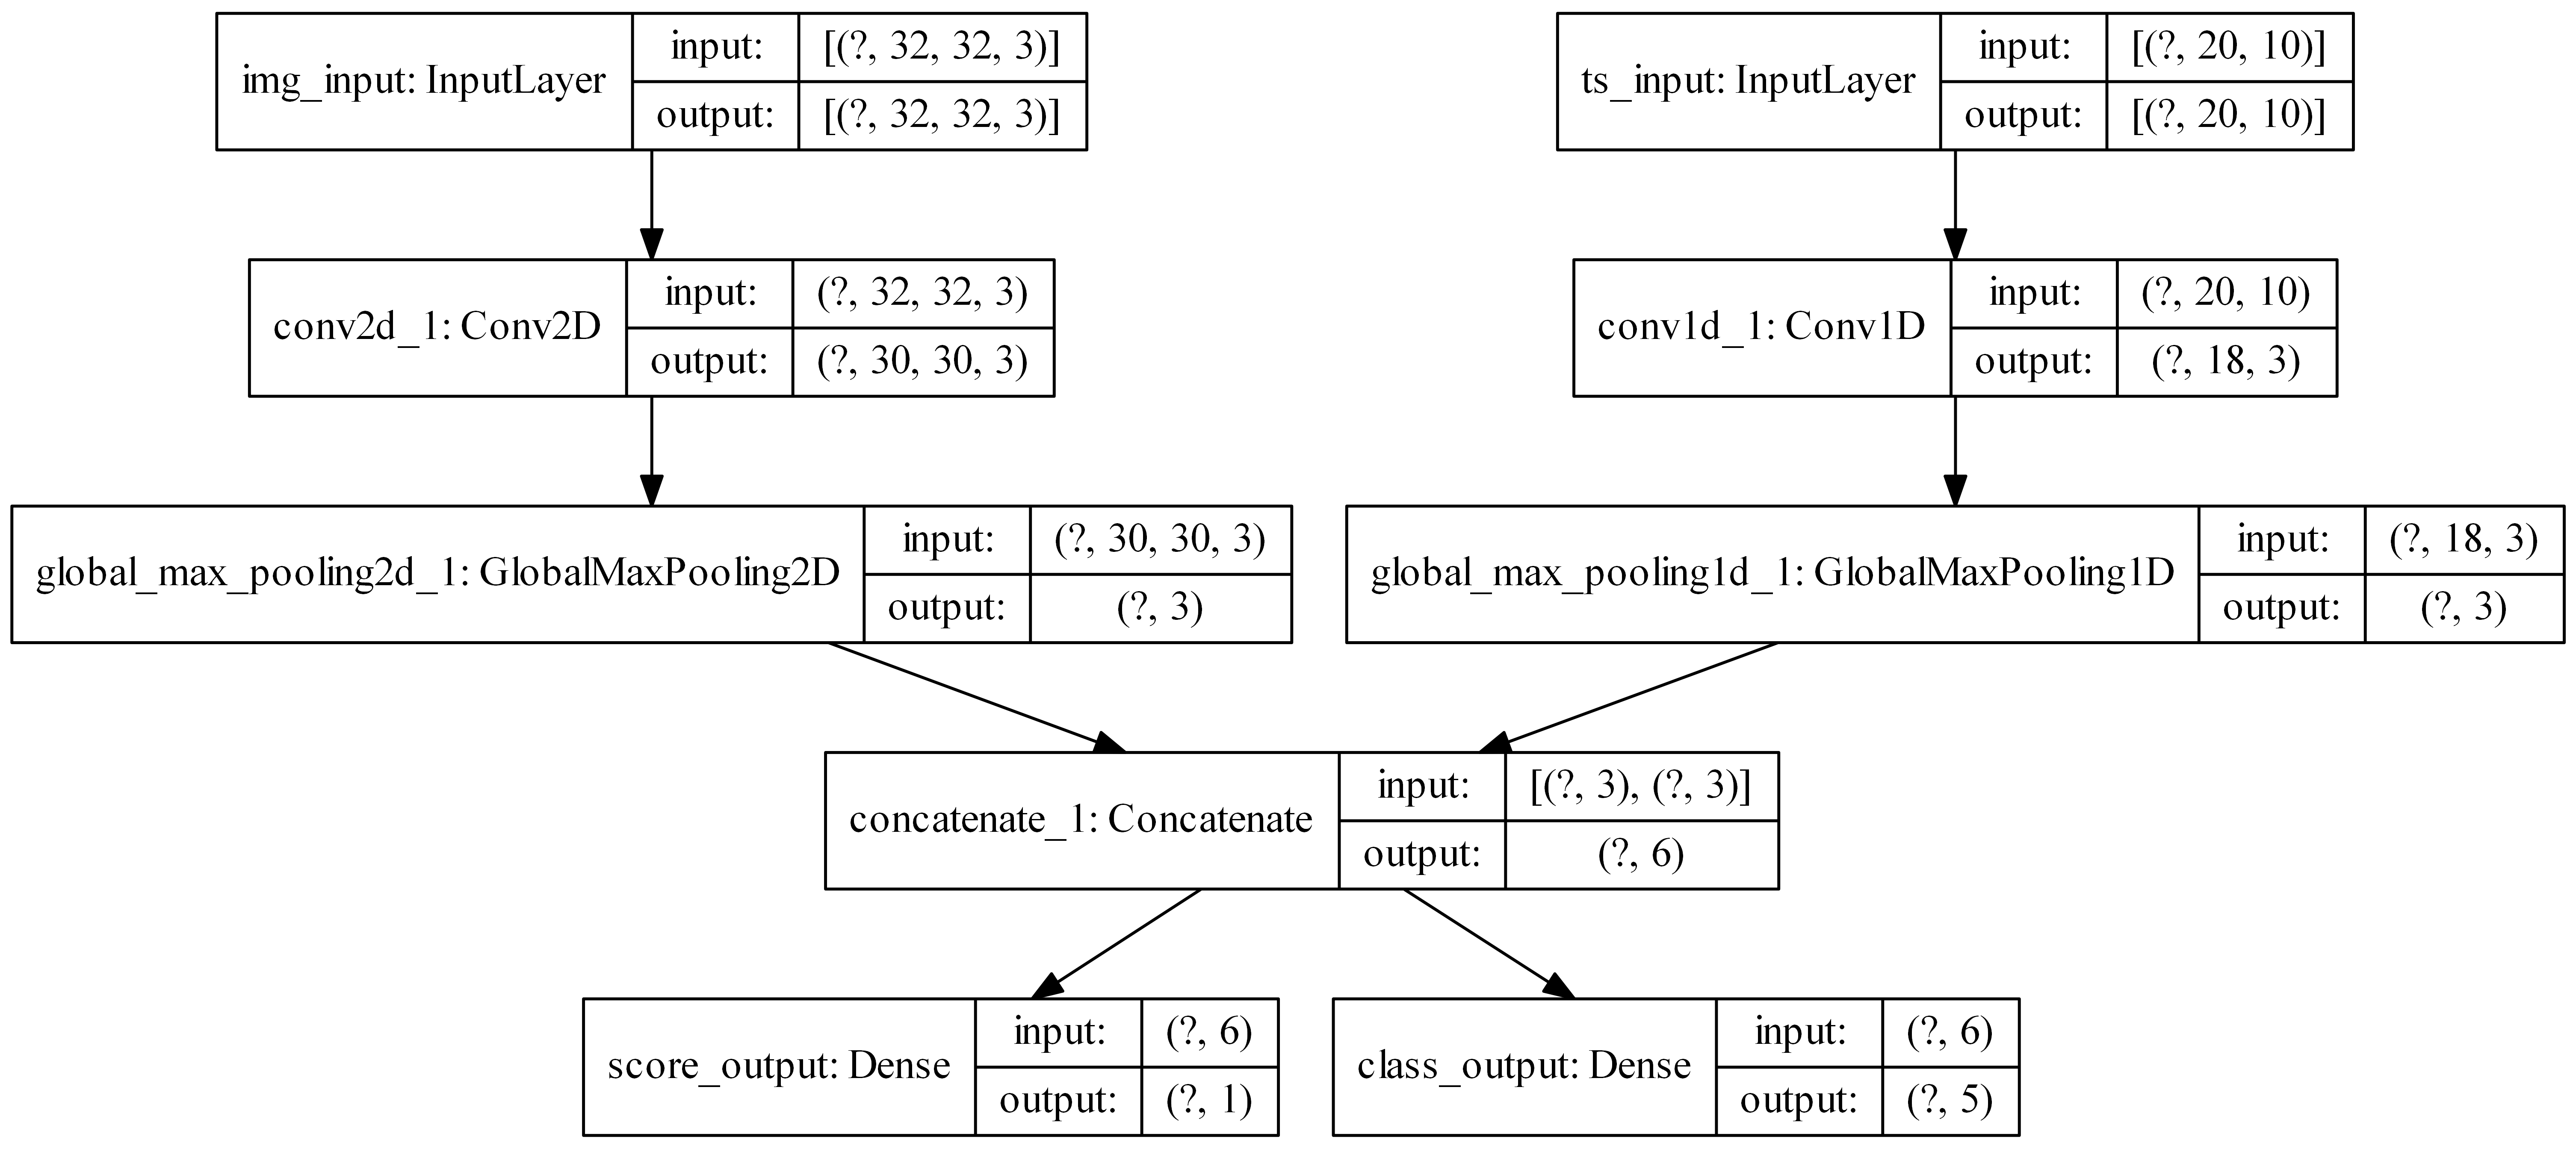

In [26]:
# https://blog.csdn.net/weixin_42459037/article/details/84066164
#- step1、pip uninstall pydotplus,pip uninstall GraphViz
#- step2、安装graphviz-2.38.msi
#- step3、配置环境变量path C:\Program Files (x86)\Graphviz2.38\bin
#- step4、pip install pydotplus
#- step5、重启电脑
#- step6、pip install graphviz
#- step7、在案例4开头引入import graphviz
tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png',show_shapes=True,dpi=500)


### 4.1损失函数

在编译时，通过将损失函数作为列表传递，我们可以为不同的输出指定不同的损失：

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[tf.keras.losses.MeanSquaredError(),
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)])

如果我们仅将单个损失函数传递给模型，则将相同的损失函数应用于每个输出，这在此处是不合适的。

### 4.2 指标函数

同样对于指标：

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[tf.keras.losses.MeanSquaredError(),
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)],
    metrics=[
        [tf.keras.metrics.MeanAbsolutePercentageError(),
        tf.keras.metrics.MeanAbsoluteError()],
        [tf.keras.metrics.CategoricalAccuracy()]
    ])

由于我们为输出层命名，因此我们还可以通过dict指定每个输出的损失和指标：

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={'score_output':tf.keras.losses.MeanSquaredError(),
         'class_output':tf.keras.losses.CategoricalCrossentropy(from_logits=True)},
    metrics={'score_output':[tf.keras.metrics.MeanAbsolutePercentageError(),
                            tf.keras.metrics.MeanAbsoluteError()],
            'class_output':[tf.keras.metrics.CategoricalAccuracy()]}
)

如果您有两个以上的输出，我们建议使用显式名称和字典。

可以使用以下参数对不同的特定于输出的损失赋予不同的权重（例如，在我们的示例中，我们可能希望通过将某类损失函数赋予更高的权重）

loss_weights:

In [31]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={'score_output':tf.keras.losses.MeanSquaredError(),
         'class_output':tf.keras.losses.CategoricalCrossentropy(from_logits=True)},
    metrics={'score_output':[tf.keras.metrics.MeanAbsolutePercentageError(),
                            tf.keras.metrics.MeanAbsoluteError()],
            'class_output':[tf.keras.metrics.CategoricalAccuracy()]},
    loss_weights={'score_output':2.,'class_output':1.}
)

您还可以选择不为某些输出计算损失，如果这些输出仅用于预测而不是训练：

In [32]:
# List loss version
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[None, tf.keras.losses.CategoricalCrossentropy(from_logits=True)])

# Or dict loss version
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={'class_output':tf.keras.losses.CategoricalCrossentropy(from_logits=True)})

### 4.3 完整运行

In [33]:
image_input = tf.keras.Input(shape=(32,32,3), name='img_input')
timeseries_input = tf.keras.Input(shape=(20,10), name='ts_input')

x1 = tf.keras.layers.Conv2D(3,3)(image_input)
x1 = tf.keras.layers.GlobalMaxPooling2D()(x1)

x2 = tf.keras.layers.Conv1D(3,3)(timeseries_input)
x2 = tf.keras.layers.GlobalMaxPooling1D()(x2)

x = tf.keras.layers.concatenate([x1, x2])

score_output = tf.keras.layers.Dense(1, name='score_output')(x)
class_output = tf.keras.layers.Dense(5, name='class_output')(x)

model = tf.keras.Model(inputs=[image_input, timeseries_input],
                      outputs = [score_output,class_output])

In [34]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[tf.keras.losses.MeanSquaredError(),
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)])

# Generate dummy Numpy data
import numpy as np

img_data = np.random.random_sample(size=(100,32,32,3))
ts_data = np.random.random_sample(size=(100,20,10))
score_targets = np.random.random_sample(size=(100,1))
class_targets = np.random.random_sample(size=(100,5))

#Fit on lists
model.fit([img_data,ts_data],[score_targets,class_targets],
         batch_size=32,
         epochs=3)

#Alternatively, fit on dicts
model.fit({'img_input':img_data,'ts_input':ts_data},
         {'score_output':score_targets,'class_output':class_targets},
         batch_size=32,
         epochs=3)

Train on 100 samples
Epoch 1/3
100/100 [==============================] - 2s 20ms/sample - loss: 7.5628 - score_output_loss: 1.7884 - class_output_loss: 5.5545
Epoch 2/3
100/100 [==============================] - 0s 174us/sample - loss: 6.6347 - score_output_loss: 1.0431 - class_output_loss: 5.2402
Epoch 3/3
100/100 [==============================] - 0s 170us/sample - loss: 6.1352 - score_output_loss: 0.9147 - class_output_loss: 5.2327
Train on 100 samples
Epoch 1/3
100/100 [==============================] - 0s 209us/sample - loss: 5.7398 - score_output_loss: 0.7582 - class_output_loss: 4.9918
Epoch 2/3
100/100 [==============================] - 0s 160us/sample - loss: 5.4904 - score_output_loss: 0.4448 - class_output_loss: 4.9151
Epoch 3/3
100/100 [==============================] - 0s 160us/sample - loss: 5.2679 - score_output_loss: 0.3778 - class_output_loss: 5.1369


In [35]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=[tf.keras.losses.MeanSquaredError(),
         tf.keras.losses.CategoricalCrossentropy(from_logits=True)])

#Generate dummy Numpy data
import numpy as np
img_data = np.random.random_sample(size=(100,32,32,3))
ts_data = np.random.random_sample(size=(100,20,10))
score_targets = np.random.random_sample(size=(100,1))
class_targets = np.random.random_sample(size=(100,5))

# Alternatively , fit on dicts
model.fit((img_data,ts_data),
         (score_targets,class_targets),
         batch_size=32,
         epochs=3)

Train on 100 samples
Epoch 1/3
100/100 [==============================] - 1s 6ms/sample - loss: 4.8315 - score_output_loss: 0.2223 - class_output_loss: 4.6103
Epoch 2/3
100/100 [==============================] - 0s 180us/sample - loss: 4.5938 - score_output_loss: 0.1247 - class_output_loss: 4.4905
Epoch 3/3
100/100 [==============================] - 0s 279us/sample - loss: 4.4965 - score_output_loss: 0.1384 - class_output_loss: 4.3875
